In [1]:
import numpy as np

import os

import time


from keras.layers import GlobalAveragePooling2D, Dense, Dropout,Activation,Flatten

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.layers import Input

from keras.models import Model

from keras.utils import np_utils

from sklearn.utils import shuffle

from sklearn.cross_validation import train_test_split
# Loading the training data

from tqdm import tqdm

PATH = '/home/jupyter/'

# Define data path

data_path = PATH + '/data_3_13/train'  

data_dir_list = os.listdir(data_path)



img_data_list= []
landmark_count = dict((k,0) for k in data_dir_list)


for dataset in data_dir_list:

	img_list=os.listdir(data_path+'/'+ dataset)
        
	img_list = tqdm(img_list)

	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))

	for img in img_list:
        
		img_list.set_description("Processing %s" % img)
        
		if img.endswith(".jpg"):
            
			img_path = data_path + '/'+ dataset + '/'+ img 

			img = image.load_img(img_path, target_size=(224, 224))

			x = image.img_to_array(img)

			x = np.expand_dims(x, axis=0)

			x = preprocess_input(x)

			img_data_list.append(x)

			landmark_count[dataset] += 1
        

Using TensorFlow backend.
/usr/local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Processing dbe8dd6d329b8f15.jpg:   0%|          | 0/6302 [00:00<?, ?it/s]

Loaded the images of dataset-6651



Processing e3d981b81e795656.jpg:   0%|          | 6/6096 [00:00<01:51, 54.77it/s]

Loaded the images of dataset-6696



Processing 8d813d7b0a410afb.jpg:   0%|          | 5/7344 [00:00<02:48, 43.43it/s]

Loaded the images of dataset-5554



Processing 54552957d90c3874.jpg:   0%|          | 4/5943 [00:00<02:45, 35.80it/s]

Loaded the images of dataset-4352



Processing 57f7d832e9ce620c.jpg:   0%|          | 4/5148 [00:00<02:12, 38.71it/s]

Loaded the images of dataset-1553



Processing e5245e4a55f8a4e6.jpg:   0%|          | 4/5729 [00:00<02:36, 36.50it/s]

Loaded the images of dataset-13526



Processing e94ecdf89561c6c8.jpg:   0%|          | 4/6031 [00:00<02:30, 39.98it/s]

Loaded the images of dataset-5376



Processing 301d24595f19795c.jpg:   0%|          | 5/5956 [00:00<02:19, 42.72it/s]

Loaded the images of dataset-2743



Processing a086092fa6fb2677.jpg:   0%|          | 5/8747 [00:00<03:14, 44.89it/s]

Loaded the images of dataset-2061



Processing 2aa740567f8e4168.jpg:   0%|          | 5/12154 [00:00<05:06, 39.60it/s]

Loaded the images of dataset-9779



Processing 953c7c3f35b12ff4.jpg: 100%|██████████| 12154/12154 [04:30<00:00, 44.92it/s]


In [2]:
# Loading the test data
data_path2 = PATH + '/data_3_13/test'  

data_dir_list2 = os.listdir(data_path2)



img_data_list2= []
landmark_count2 = dict((k,0) for k in data_dir_list2)


for dataset in data_dir_list2:

	img_list2=os.listdir(data_path2+'/'+ dataset)
        
	img_list2= tqdm(img_list2[:500])

	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))

	for img in img_list2:
        
		img_list2.set_description("Processing %s" % img)
        
		if img.endswith(".jpg"):
            
			img_path2 = data_path2 + '/'+ dataset + '/'+ img 

			img = image.load_img(img_path2, target_size=(224, 224))

			x = image.img_to_array(img)

			x = np.expand_dims(x, axis=0)

			x = preprocess_input(x)

			img_data_list2.append(x)

			landmark_count2[dataset] += 1

Processing 7b2ac7f3c569ac1f.jpg:   1%|          | 3/500 [00:00<00:18, 26.41it/s]

Loaded the images of dataset-6651



Processing d1217d6a34d03aba.jpg:   1%|          | 5/500 [00:00<00:11, 44.01it/s]

Loaded the images of dataset-6696



Processing 063cedf1e7010213.jpg:   1%|          | 6/500 [00:00<00:09, 53.30it/s]

Loaded the images of dataset-5554



Processing bbef0caec498b9bc.jpg:   1%|          | 5/500 [00:00<00:10, 49.07it/s]

Loaded the images of dataset-4352



Processing 078f9f364627bd16.jpg:   1%|          | 5/500 [00:00<00:10, 46.84it/s]

Loaded the images of dataset-1553



Processing df28933c2772bb04.jpg:   1%|          | 6/500 [00:00<00:09, 51.01it/s]

Loaded the images of dataset-13526



Processing 35e23b2b3a07d3b2.jpg:   1%|          | 5/500 [00:00<00:10, 45.42it/s]

Loaded the images of dataset-5376



Processing 9d4505fb1586400c.jpg:   1%|          | 5/500 [00:00<00:10, 49.05it/s]

Loaded the images of dataset-2743



Processing e97bc15b957e275e.jpg:   1%|          | 5/500 [00:00<00:11, 44.80it/s]

Loaded the images of dataset-2061



Processing e45f242ecd0bb3d3.jpg:   1%|          | 6/500 [00:00<00:09, 50.45it/s]

Loaded the images of dataset-9779



Processing 40a52f851c9aebce.jpg: 100%|██████████| 500/500 [00:10<00:00, 46.68it/s]


In [3]:
#info of training dataset
img_data = np.array(img_data_list)


print (img_data.shape)

img_data=np.rollaxis(img_data,1,0)

print (img_data.shape)

img_data=img_data[0]

print (img_data.shape)

(69450, 1, 224, 224, 3)
(1, 69450, 224, 224, 3)
(69450, 224, 224, 3)


In [4]:
# info of test dataset
img_data2 = np.array(img_data_list2)

print (img_data2.shape)

img_data2=np.rollaxis(img_data2,1,0)

print (img_data2.shape)

img_data2=img_data2[0]

print (img_data2.shape)

(4999, 1, 224, 224, 3)
(1, 4999, 224, 224, 3)
(4999, 224, 224, 3)


In [5]:
# Define the number of classes

num_classes = len(landmark_count)

num_of_samples = img_data.shape[0]

labels = np.ones((num_of_samples,),dtype='int64')

number_images = list(landmark_count.values())

number_images_index = []

for i in range(len(number_images)):
    number_images_index.append(sum(number_images[:i+1]))

number_images_index.insert(0, 0)

for i in range(num_classes):
    labels[number_images_index[i]:number_images_index[i+1]] = i

# convert class labels to on-hot encoding

Y_train = np_utils.to_categorical(labels, num_classes)

X_train = img_data


In [6]:
# Define the number of classes

num_classes2 = len(landmark_count2)

num_of_samples2 = img_data2.shape[0]

labels2 = np.ones((num_of_samples2,),dtype='int64')

number_images2 = list(landmark_count2.values())

number_images_index2 = []

for i in range(len(number_images2)):
    number_images_index2.append(sum(number_images2[:i+1]))

number_images_index2.insert(0, 0)

for i in range(num_classes2):
    labels[number_images_index2[i]:number_images_index2[i+1]] = i

# convert class labels to on-hot encoding

Y_test = np_utils.to_categorical(labels2, num_classes2)

X_test = img_data2

In [7]:
# change the lable of y value of test dataset
labels2[0:500] = 0
labels2[500:1000] = 1
labels2[1000:1500] = 2
labels2[1500:2000] = 3
labels2[2000:2500] = 4
labels2[2500:3000] = 5
labels2[3000:3500] = 6
labels2[3500:4000] = 7
labels2[4000:4500] = 8
labels2[4500:5000] = 9

In [24]:
Y_test = np_utils.to_categorical(labels2, num_classes2)

In [9]:
# Fine tune the resnet 50

image_input = Input(shape=(224, 224, 3))

model = ResNet50(weights='imagenet',include_top=False)

last_layer = model.output

# add a global spatial average pooling layer

x = GlobalAveragePooling2D()(last_layer)

# add fully-connected & dropout layers

x = Dense(512, activation='relu',name='fc-1')(x)

x = Dropout(0.5)(x)

x = Dense(256, activation='relu',name='fc-2')(x)

x = Dropout(0.5)(x)

# a softmax layer for 10 classes

out = Dense(num_classes, activation='softmax',name='output_layer')(x)



# this is the model we will train

custom_resnet_model2 = Model(inputs=model.input, outputs=out)



for layer in custom_resnet_model2.layers[:-6]:

	layer.trainable = False



custom_resnet_model2.layers[-1].trainable



custom_resnet_model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])



t=time.time()

hist = custom_resnet_model2.fit(X_train, Y_train, batch_size=32, epochs=5, verbose=1, validation_data=(X_test, Y_test))

print('Training time: %s' % (t - time.time()))

(loss, accuracy) = custom_resnet_model2.evaluate(X_test, Y_test, batch_size=10, verbose=1)



print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

/usr/local/lib/python3.5/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Train on 69450 samples, validate on 4999 samples
Epoch 1/5
69450/69450 [==============================] - 2832s 41ms/step - loss: 1.0147 - acc: 0.6266 - val_loss: 1.6434 - val_acc: 0.4163
Epoch 2/5
69450/69450 [==============================] - 2585s 37ms/step - loss: 0.7881 - acc: 0.6926 - val_loss: 1.4272 - val_acc: 0.4341
Epoch 3/5
69450/69450 [==============================] - 2219s 32ms/step - loss: 0.7399 - acc: 0.7102 - val_loss: 1.4685 - val_acc: 0.4573
Epoch 4/5
69450/69450 [==============================] - 2230s 32ms/step - loss: 0.7189 - acc: 0.7138 - val_loss: 1.1451 - val_acc: 0.4231
Epoch 5/5
69450/69450 [==============================] - 2205s 32ms/step - loss: 0.6996 - acc: 0.7211 - val_loss: 1.2482 - val_acc: 0.3997
Training time: -12072.263835191727
4999/4999 [==============================] - 194s 39ms/step
[INFO] loss=1.2482, accuracy: 39.9680%


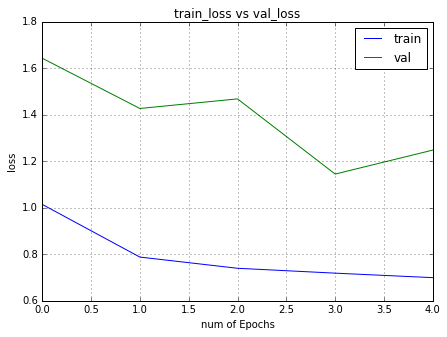

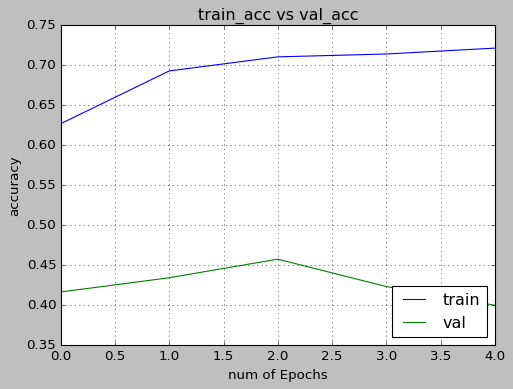

In [11]:

############################################################################################

import matplotlib.pyplot as plt

# visualizing losses and accuracy

train_loss=hist.history['loss']

val_loss=hist.history['val_loss']

train_acc=hist.history['acc']

val_acc=hist.history['val_acc']

xc=range(5)



plt.figure(1,figsize=(7,5))

plt.plot(xc,train_loss)

plt.plot(xc,val_loss)

plt.xlabel('num of Epochs')

plt.ylabel('loss')

plt.title('train_loss vs val_loss')

plt.grid(True)

plt.legend(['train','val'])

plt.style.use(['classic'])



plt.figure(2,figsize=(7,5))

plt.plot(xc,train_acc)

plt.plot(xc,val_acc)

plt.xlabel('num of Epochs')

plt.ylabel('accuracy')

plt.title('train_acc vs val_acc')

plt.grid(True)

plt.legend(['train','val'],loc=4)

plt.style.use(['classic'])

In [12]:
# test result of class 13526
img_list_test13526=os.listdir(data_path2 + '/13526')
img_13526_correct = []
img_13526_uncorrect = []
img_13526_uncorrect_pred = []
img_list_test13526 = tqdm(img_list_test13526)

for img in img_list_test13526:
    img_list_test13526.set_description("Processing %s" % img)
    if img.endswith(".jpg"):
        img_path = data_path2 + '/13526' + '/' + img
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        preds = custom_resnet_model2.predict(x)
        pred_result = list(preds[0])
        max_value = max(pred_result)
        max_index = pred_result.index(max_value)
        if data_dir_list2[max_index] == '13526':
            img_13526_correct.append(img_path)
        else:
            img_13526_uncorrect.append(img_path)
            img_13526_uncorrect_pred.append(data_dir_list2[max_index])

Processing bf0abff0c339ac47.jpg: 100%|██████████| 2823/2823 [06:42<00:00,  6.72it/s]


In [13]:
print("total number of 13526 class:", len(img_list_test13526))
print("correct prediction: ", len(img_13526_correct))
print ("uncorrect prediction: ", len(img_13526_uncorrect))
print ("accuracy of 13526: ", len(img_13526_correct)/len(img_list_test13526))

total number of 13526 class: 2823
correct prediction:  15
uncorrect prediction:  2807
accuracy of 13526:  0.005313496280552604


In [26]:
from collections import Counter
Counter(img_13526_uncorrect_pred)

Counter({'1553': 2734,
         '2743': 37,
         '5376': 2,
         '6651': 11,
         '6696': 22,
         '9779': 1})

In [27]:
# first 5 incorrect image
img_13526_uncorrect[:5]

['/home/jupyter//data_3_13/test/13526/35e020b9f28c0255.jpg',
 '/home/jupyter//data_3_13/test/13526/41feaaa4db33e563.jpg',
 '/home/jupyter//data_3_13/test/13526/f7b96153f254f6a0.jpg',
 '/home/jupyter//data_3_13/test/13526/f73ffd4e5b530373.jpg',
 '/home/jupyter//data_3_13/test/13526/730e8072d5c04f11.jpg']

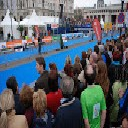

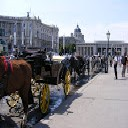

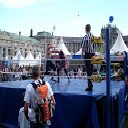

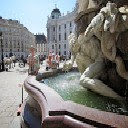

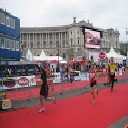

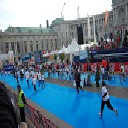

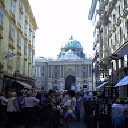

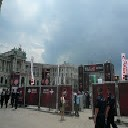

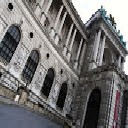

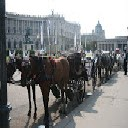

In [29]:
# example of correct images
from IPython.display import display, Image

for img in img_13526_correct[:10]:
    display(Image(filename= img))

In [14]:
img_list_test1553=os.listdir(data_path2 + '/1553')
img_1553_correct = []
img_1553_uncorrect = []
img_1553_uncorrect_pred = []
img_list_test1553 = tqdm(img_list_test1553[:1000])

for img in img_list_test1553:
    img_list_test1553.set_description("Processing %s" % img)
    if img.endswith(".jpg"):
        img_path = data_path2 + '/1553' + '/' + img
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        preds = custom_resnet_model2.predict(x)
        pred_result = list(preds[0])
        max_value = max(pred_result)
        max_index = pred_result.index(max_value)
        if data_dir_list2[max_index] == '1553':
            img_1553_correct.append(img_path)
        else:
            img_1553_uncorrect.append(img_path)
            img_1553_uncorrect_pred.append(data_dir_list2[max_index])

Processing c7c220233b0a0967.jpg: 100%|██████████| 1000/1000 [02:14<00:00,  7.11it/s]


In [15]:
print("total number of 1553 class:", len(img_list_test1553))
print("correct prediction: ", len(img_1553_correct))
print ("uncorrect prediction: ", len(img_1553_uncorrect))
print ("accuracy of 1553: ", len(img_1553_correct)/len(img_list_test1553))

total number of 1553 class: 1000
correct prediction:  871
uncorrect prediction:  129
accuracy of 1553:  0.871


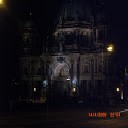

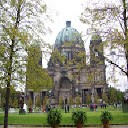

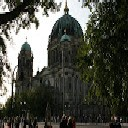

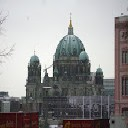

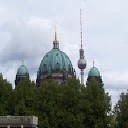

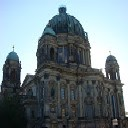

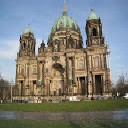

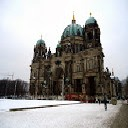

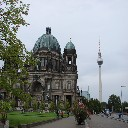

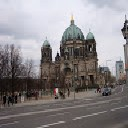

In [33]:
# example of correct images
from IPython.display import display, Image

for img in img_1553_correct[:10]:
    display(Image(filename= img))

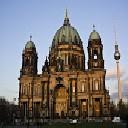

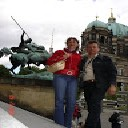

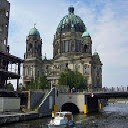

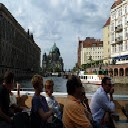

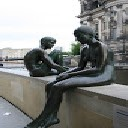

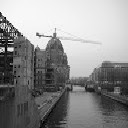

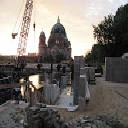

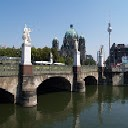

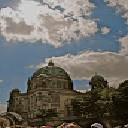

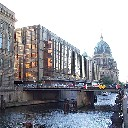

In [32]:
# examples of incorrect images
for img in img_1553_uncorrect[:10]:
    display(Image(filename= img))

In [18]:
img_list_test2743=os.listdir(data_path2 + '/2743')
img_2743_correct = []
img_2743_uncorrect = []
img_2743_uncorrect_pred = []
img_list_test2743 = tqdm(img_list_test2743)

for img in img_list_test2743:
    img_list_test2743.set_description("Processing %s" % img)
    if img.endswith(".jpg"):
        img_path = data_path2 + '/2743' + '/' + img
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        preds = custom_resnet_model2.predict(x)
        pred_result = list(preds[0])
        max_value = max(pred_result)
        max_index = pred_result.index(max_value)
        if data_dir_list2[max_index] == '2743':
            img_2743_correct.append(img_path)
        else:
            img_2743_uncorrect.append(img_path)
            img_2743_uncorrect_pred.append(data_dir_list2[max_index])

Processing af7bbca1ede2e401.jpg: 100%|██████████| 2938/2938 [06:53<00:00,  7.07it/s]


In [19]:
print("total number of 2743 class:", len(img_list_test2743))
print("correct prediction: ", len(img_2743_correct))
print ("uncorrect prediction: ", len(img_2743_uncorrect))
print ("accuracy of 2743: ", len(img_2743_correct)/len(img_list_test2743))

total number of 2743 class: 2938
correct prediction:  130
uncorrect prediction:  2808
accuracy of 2743:  0.04424778761061947


In [28]:
Counter(img_2743_uncorrect_pred)

Counter({'13526': 16,
         '1553': 449,
         '2061': 12,
         '4352': 49,
         '5376': 2286,
         '5554': 1,
         '6651': 9,
         '6696': 28,
         '9779': 16})

In [20]:
img_list_test6651=os.listdir(data_path2 + '/6651')
img_6651_correct = []
img_6651_uncorrect = []
img_6651_uncorrect_pred = []
img_list_test6651 = tqdm(img_list_test6651[:1000])

for img in img_list_test6651:
    img_list_test6651.set_description("Processing %s" % img)
    if img.endswith(".jpg"):
        img_path = data_path2 + '/6651' + '/' + img
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        preds = custom_resnet_model2.predict(x)
        pred_result = list(preds[0])
        max_value = max(pred_result)
        max_index = pred_result.index(max_value)
        if data_dir_list2[max_index] == '6651':
            img_6651_correct.append(img_path)
        else:
            img_6651_uncorrect.append(img_path)
            img_6651_uncorrect_pred.append(data_dir_list2[max_index])

Processing 55c3d700e01590b8.jpg: 100%|██████████| 1000/1000 [02:13<00:00,  6.86it/s]


In [21]:
print("total number of 6651 class:", len(img_list_test6651))
print("correct prediction: ", len(img_6651_correct))
print ("uncorrect prediction: ", len(img_6651_uncorrect))
print ("accuracy of 6651: ", len(img_6651_correct)/len(img_list_test6651))

total number of 6651 class: 1000
correct prediction:  836
uncorrect prediction:  164
accuracy of 6651:  0.836


In [ ]:
img_list_test6696=os.listdir(data_path2 + '/6696')
img_6696_correct = []
img_6696_uncorrect = []
img_6696_uncorrect_pred = []
img_list_test6696 = tqdm(img_list_test6696[:1000])

for img in img_list_test6696:
    img_list_test6696.set_description("Processing %s" % img)
    if img.endswith(".jpg"):
        img_path = data_path2 + '/6696' + '/' + img
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        preds = custom_resnet_model2.predict(x)
        pred_result = list(preds[0])
        max_value = max(pred_result)
        max_index = pred_result.index(max_value)
        if data_dir_list2[max_index] == '6696':
            img_6696_correct.append(img_path)
        else:
            img_6696_uncorrect.append(img_path)
            img_6696_uncorrect_pred.append(data_dir_list2[max_index])

Processing 71558a4d5d29a1a8.jpg:  80%|███████▉  | 796/1000 [01:42<00:25,  8.01it/s]

In [ ]:
print("total number of 6696 class:", len(img_list_test6696))
print("correct prediction: ", len(img_6696_correct))
print ("uncorrect prediction: ", len(img_6696_uncorrect))
print ("accuracy of 6696: ", len(img_6696_correct)/len(img_list_test6696))